# Hourly Energy consumption Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df  = pd.read_csv("AEP_hourly.csv",parse_dates=True, index_col=[0])

In [77]:
df.rename(columns={'AEP_MW': 'power_demand'},inplace='True')

In [79]:
df.head()

,power_demand
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


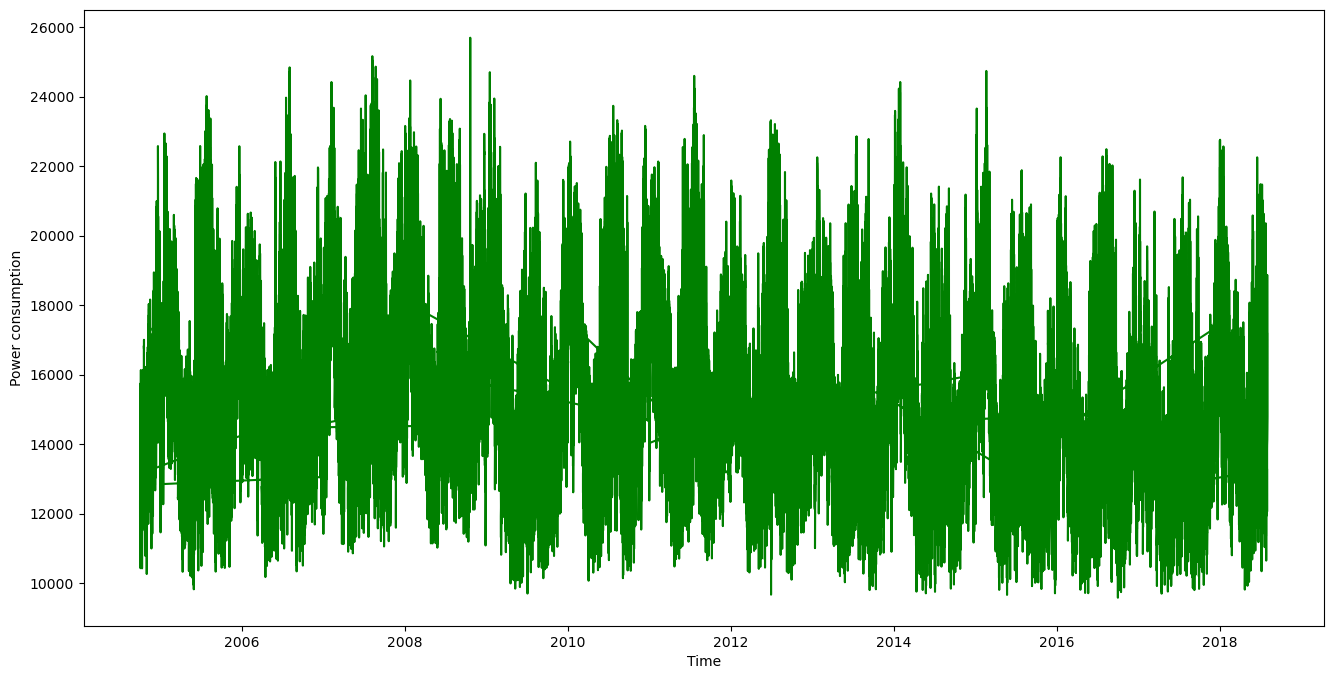

In [81]:
# plots

plt.figure(figsize=(16,8))
plt.plot(df["power_demand"], color = 'green')
plt.xlabel('Time')
plt.ylabel('Power consumption')
plt.show()

<Axes: xlabel='power_demand', ylabel='Count'>

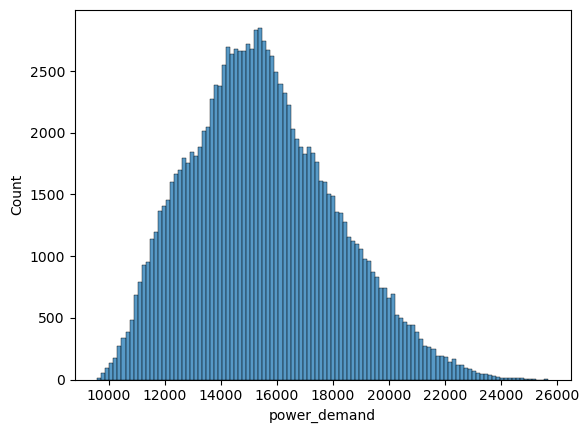

In [83]:
sns.histplot(df["power_demand"])

A normal distribution is obtained

## Data Cleaning

In [97]:
#null values
df.isnull().sum()

hour            0
dayofweek       0
dayofmonth      0
dayofyear       0
quarter         0
month           0
year            0
weekofyear      0
power_demand    0
dtype: int64

In [107]:
#duplicate values
df.duplicated().sum()

0

In [101]:
# Check datetimes frequency
print(f"Data datetime frequency : {df.index.array.freq}")

Data datetime frequency : None


In [109]:
dates = pd.to_datetime(df.index)
date_range = pd.date_range(start=min(dates), end=max(dates), freq='H')
print(f"Missing datetimes:\n{date_range.difference(dates.array)}")

Missing datetimes:
DatetimeIndex(['2004-10-31 02:00:00', '2005-04-03 03:00:00',
               '2005-10-30 02:00:00', '2006-04-02 03:00:00',
               '2006-10-29 02:00:00', '2007-03-11 03:00:00',
               '2007-11-04 02:00:00', '2008-03-09 03:00:00',
               '2008-11-02 02:00:00', '2009-03-08 03:00:00',
               '2009-11-01 02:00:00', '2010-03-14 03:00:00',
               '2010-11-07 02:00:00', '2010-12-10 00:00:00',
               '2011-03-13 03:00:00', '2011-11-06 02:00:00',
               '2012-03-11 03:00:00', '2012-11-04 02:00:00',
               '2012-12-06 04:00:00', '2013-03-10 03:00:00',
               '2013-11-03 02:00:00', '2014-03-09 03:00:00',
               '2014-03-11 14:00:00', '2015-03-08 03:00:00',
               '2016-03-13 03:00:00', '2017-03-12 03:00:00',
               '2018-03-11 03:00:00'],
              dtype='datetime64[ns]', freq=None)


/tmp/ipykernel_6178/579720900.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=min(dates), end=max(dates), freq='H')


In [111]:
df.duplicated().sum()

0

In [115]:
df = df.reindex(dates)
df['power_demand'].interpolate(method='linear', inplace=True)

/tmp/ipykernel_6178/3734372004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['power_demand'].interpolate(method='linear', inplace=True)


In [125]:
df.head(10)

,hour,dayofweek,dayofmonth,dayofyear,quarter,month,year,weekofyear,power_demand
Datetime,,,,,,,,,
2004-12-31 01:00:00,1,4,31,366,4,12,2004,53,13478.0
2004-12-31 02:00:00,2,4,31,366,4,12,2004,53,12865.0
2004-12-31 03:00:00,3,4,31,366,4,12,2004,53,12577.0
2004-12-31 04:00:00,4,4,31,366,4,12,2004,53,12517.0
2004-12-31 05:00:00,5,4,31,366,4,12,2004,53,12670.0
2004-12-31 06:00:00,6,4,31,366,4,12,2004,53,13038.0
2004-12-31 07:00:00,7,4,31,366,4,12,2004,53,13692.0
2004-12-31 08:00:00,8,4,31,366,4,12,2004,53,14297.0
2004-12-31 09:00:00,9,4,31,366,4,12,2004,53,14719.0


In [127]:

df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['dayofmonth'] = df.index.day
df['dayofyear'] = df.index.dayofyear
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['weekofyear'] = df.index.isocalendar().week.astype("int")



In [129]:
df = df[['hour','dayofweek', 'dayofmonth','dayofyear', 'quarter',
             'month','year', 'weekofyear', "power_demand"]]

In [139]:
df

,hour,dayofweek,dayofmonth,dayofyear,quarter,month,year,weekofyear,power_demand
Datetime,,,,,,,,,
2004-12-31 01:00:00,1,4,31,366,4,12,2004,53,13478.0
2004-12-31 02:00:00,2,4,31,366,4,12,2004,53,12865.0
2004-12-31 03:00:00,3,4,31,366,4,12,2004,53,12577.0
2004-12-31 04:00:00,4,4,31,366,4,12,2004,53,12517.0
2004-12-31 05:00:00,5,4,31,366,4,12,2004,53,12670.0
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,1,1,2018,1,21089.0
2018-01-01 21:00:00,21,0,1,1,1,1,2018,1,20999.0
2018-01-01 22:00:00,22,0,1,1,1,1,2018,1,20820.0


/tmp/ipykernel_6178/3229266013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="hour", y="power_demand", ax=axes[0], palette = 'husl')


<Axes: xlabel='month', ylabel='power_demand'>

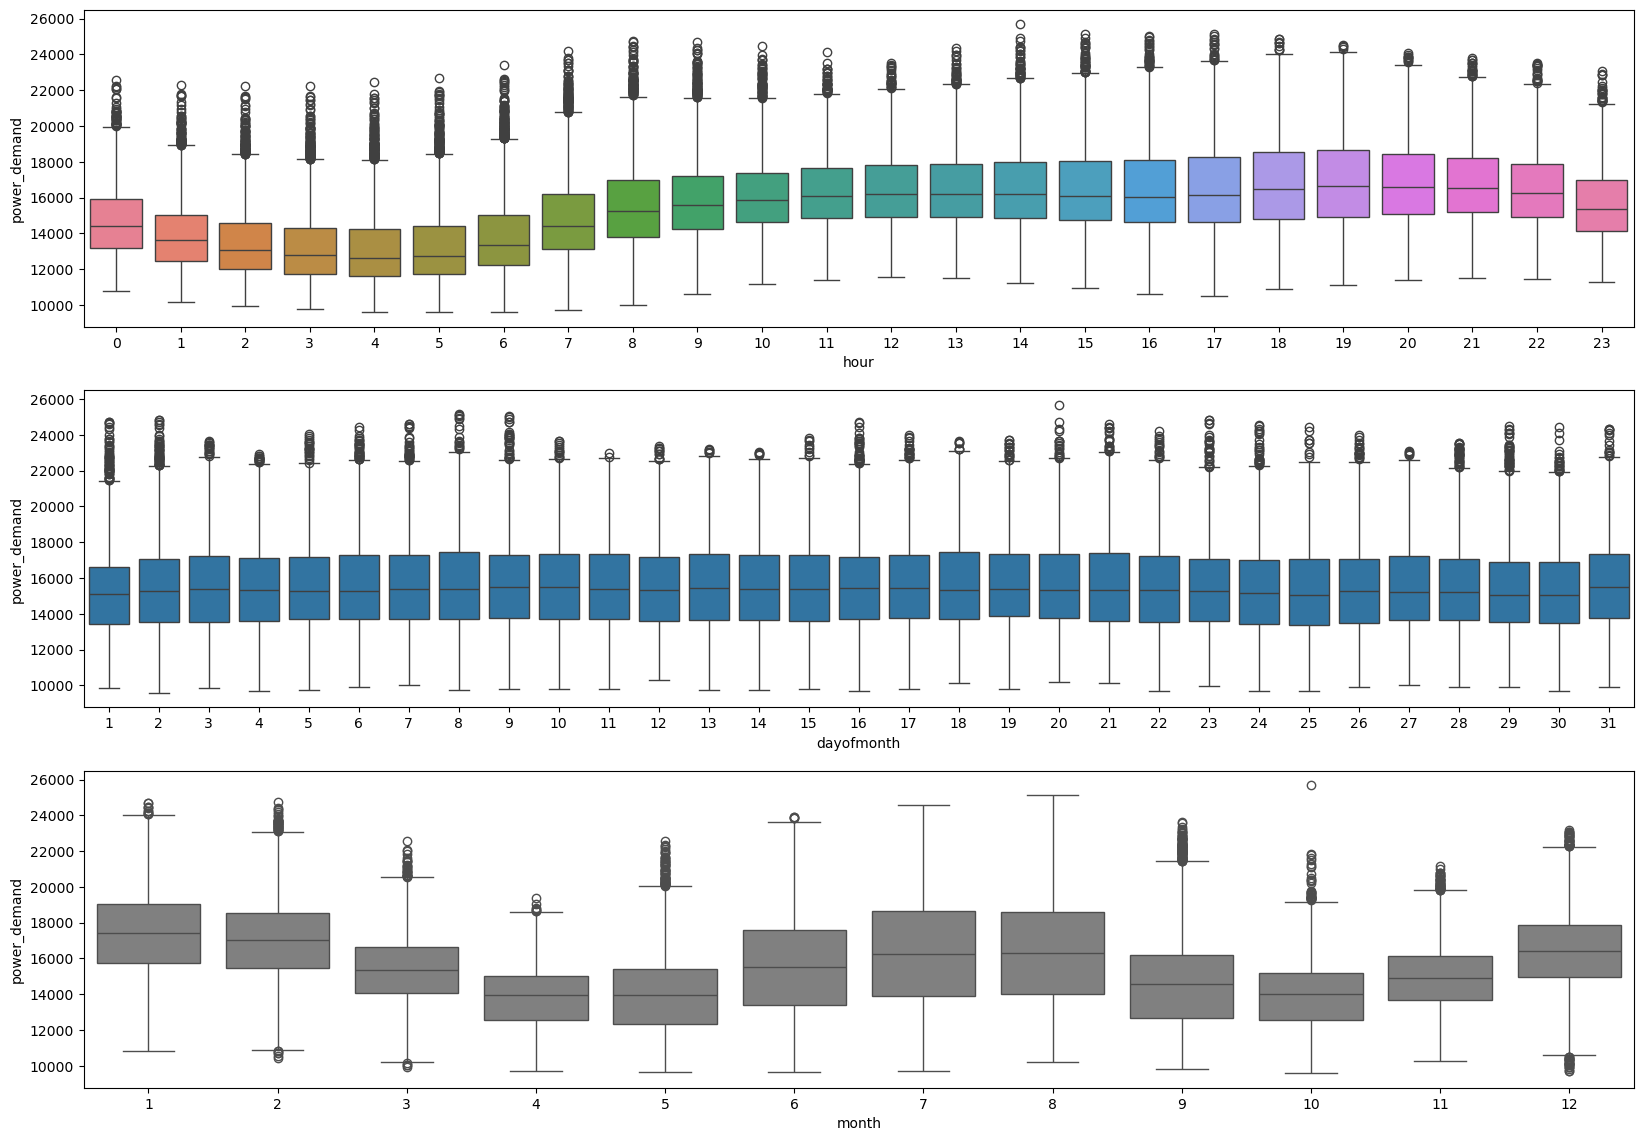

In [151]:
# plot hourly, daily and monthly power consumption
fig, axes = plt.subplots(3, figsize=(20, 14))
sns.boxplot(df, x="hour", y="power_demand", ax=axes[0], palette = 'husl')
sns.boxplot(df, x="dayofmonth", y="power_demand", ax=axes[1])
sns.boxplot(df, x="month", y="power_demand", ax=axes[2], color = 'grey')

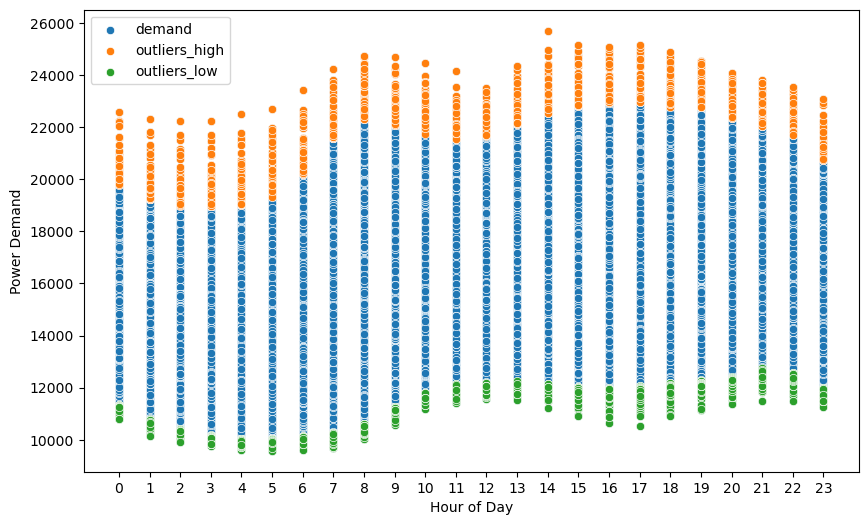

In [165]:
d = df.copy()

# below 1% quantile
d = d.merge(d.groupby('hour')
            .quantile(0.01, numeric_only=True)["power_demand"]\
            .rename('OUTLIERS_LOW'),
             on='hour',
             how='left')
# over 99% quantile
d = d.merge(d.groupby('hour')\
            .quantile(0.99, numeric_only=True)["power_demand"]\
            .rename('OUTLIERS_HIGH'),
             on='hour',
             how='left')

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=d, y="power_demand", x='hour')
sns.scatterplot(data=d.query(f'power_demand > OUTLIERS_HIGH'), y="power_demand", x='hour',label='outliers_high')
sns.scatterplot(data=d.query(f'power_demand < OUTLIERS_LOW'), y="power_demand", x='hour', label='outliers_low')
plt.ylabel("Power Demand")
plt.xlabel('Hour of Day')
ax.set_xticks(range(24))
ax.legend(['demand', 'outliers_high', 'outliers_low'])